In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import dataframe_image as dfi
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 70 #define 300 dpi for saving figures
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [11]:
dfes = pd.read_csv('../Maysville_multi_quan.csv')
dfes['FID_RiverRd_AOI'] = np.where(dfes['NWI']=='wetland', 1, 0)
#dfes['NWI'] = np.where(dfes['NWI']=='wetland', 'wetland', 'nonwetland')
dfes['NWI'].value_counts()

nonwetland    10189
wetland        7159
Name: NWI, dtype: int64

In [6]:
#Identifier is MIN, MAX, MEAN, RANGE etc.
def create_heatmap(identifier, ax, title):
    cols = []
    for (columnName, columnData) in dfes.iteritems():
        if identifier in columnName:
            cols.append(columnName)
    dfes_temp = pd.DataFrame(dfes, columns=cols)
    corr = dfes_temp.corr()
    ax.set_title(title)
    sns.heatmap(corr, cmap="Blues", ax=ax, square=True)

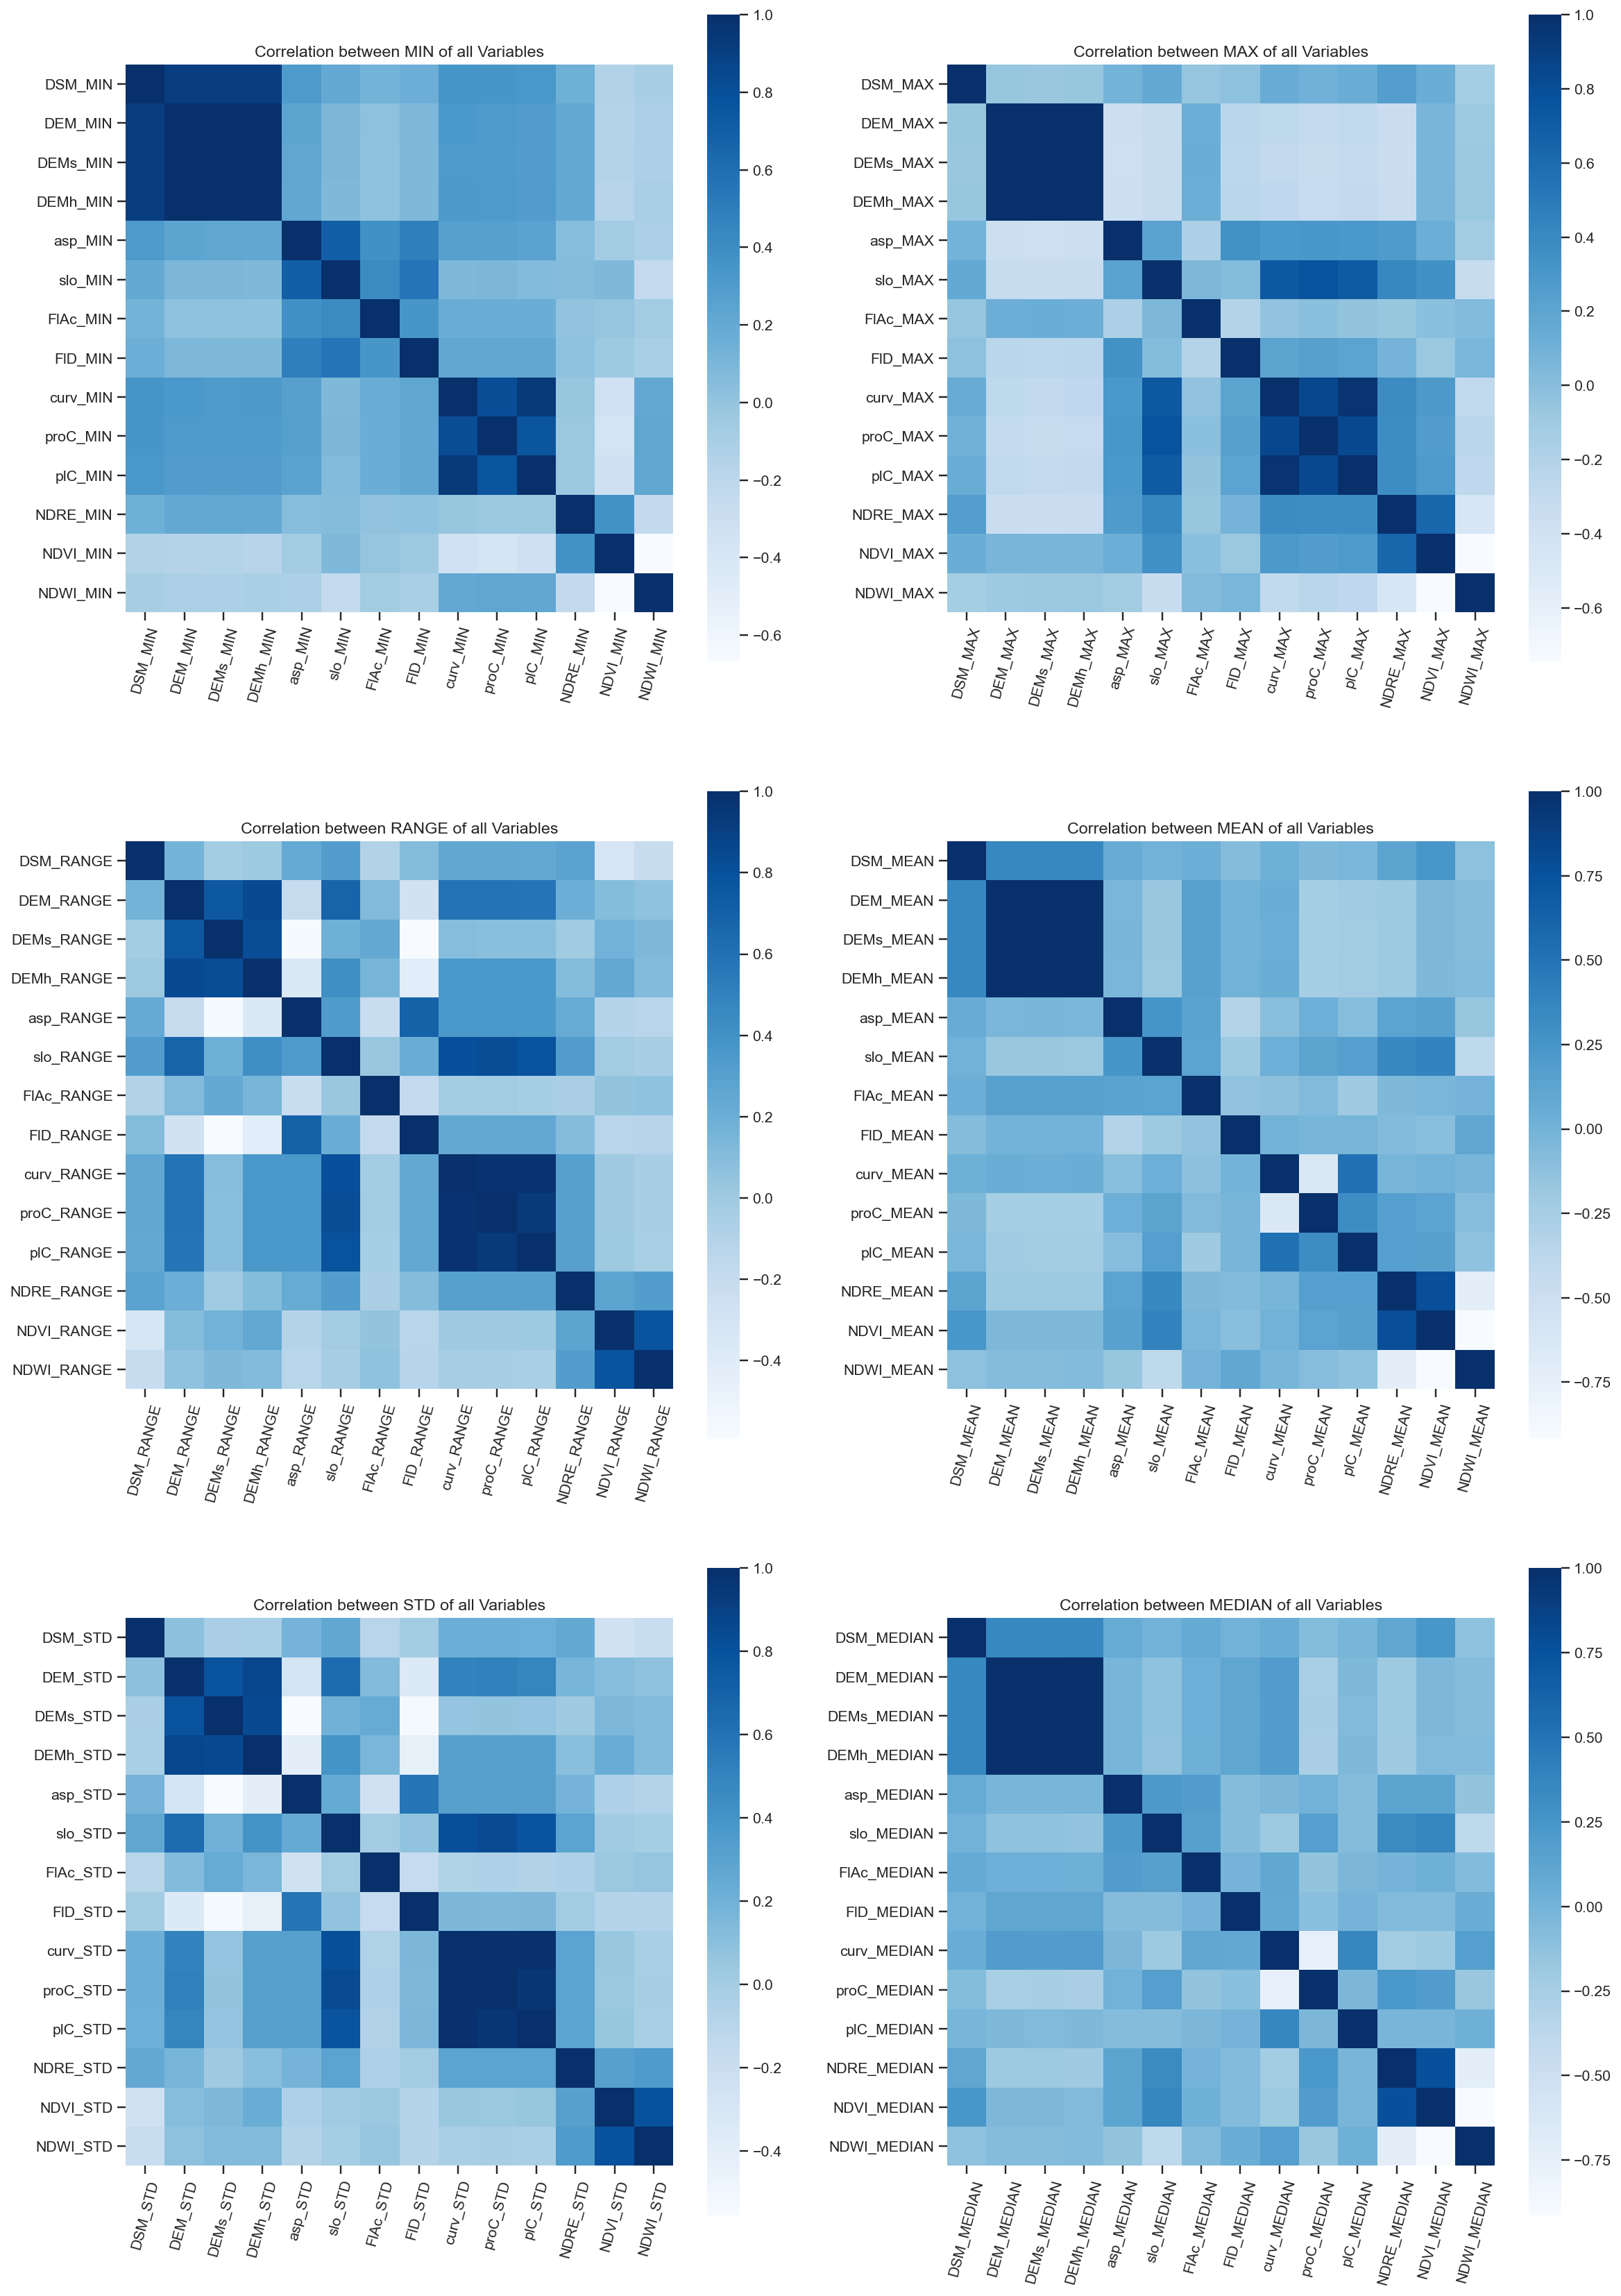

In [8]:
identifier_list = ["MIN", "MAX", "RANGE", "MEAN", "STD", "MEDIAN"]
fig,axn = plt.subplots(3, 2, figsize=(20,30))
i = 0
for ax in axn.flat:
    create_heatmap(identifier_list[i], ax, f"Correlation between {identifier_list[i]} of all Variables")
    ax.tick_params(axis='x', labelrotation=75)
    i+=1
fig.savefig('../Images/corr_heatmap.jpg')

In [9]:
corr = dfes.corr()
df_corr = pd.DataFrame(corr['FID_RiverRd_AOI'])
df_corr = df_corr[:-1].sort_values(by=["FID_RiverRd_AOI"])
pd.set_option('display.max_rows', None)
df_corr

,FID_RiverRd_AOI
DEMs_MAX,-0.721513
DEM_MAX,-0.720169
DEMs_MEAN,-0.716623
DEMs_MEDIAN,-0.716521
DEMh_MAX,-0.716384
DEM_MEDIAN,-0.715945
DEM_MEAN,-0.715901
DEMs_SUM,-0.713033
DEM_SUM,-0.712325
DEMs_MIN,-0.711467


In [12]:
df_corr.abs().sort_values(by=["FID_RiverRd_AOI"])[::-1]

,FID_RiverRd_AOI
DEMs_MAX,0.721513
DEM_MAX,0.720169
DEMs_MEAN,0.716623
DEMs_MEDIAN,0.716521
DEMh_MAX,0.716384
DEM_MEDIAN,0.715945
DEM_MEAN,0.715901
DEMs_SUM,0.713033
DEM_SUM,0.712325
DEMs_MIN,0.711467
